# 5.1 - Ajuste

### GridSearching  -  CrossValidation


![grid](images/grid.png)

![cv](images/cv.ppm)

In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np

from sklearn.datasets import make_circles, load_boston
from sklearn.model_selection import train_test_split as tts

from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import RandomForestClassifier as RFC

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
def grid(modelo, param):

    grid=GridSearchCV(modelo,    # modelo de machine learning
                      param,     # dictio dnd key=nombre del hiperparametro, value=lista de valores
                      cv=5,      # 5 cortes del 20% de los datos
                      n_jobs=-1  # para que use todos los cores de la maquina
                     )

    grid.fit(X_train, y_train)

    print('Acierto train: {:.2f}'.format(grid.score(X_train, y_train)))
    print('Acierto test: {:.2f}'.format(grid.score(X_test, y_test)))
    print('Mejores parametros: {}'.format(grid.best_params_))
    print('Mejopr acierto cv: {:.2f}'.format(grid.best_score_))
    
    return grid.best_estimator_.fit(X_train, y_train)


In [3]:
X=load_boston().data
y=load_boston().target

In [4]:
X_train, X_test, y_train, y_test = tts(X, y)

In [5]:
rfr=RFR()
rfr.fit(X_train, y_train)

train_score=rfr.score(X_train, y_train)
test_score=rfr.score(X_test, y_test)

train_score, test_score

(0.9793300866824777, 0.8761311863836405)

In [6]:
params={'n_estimators': [290, 300, 310],
        'criterion': ['mse', 'mae'],
        'max_leaf_nodes': [9, 15, 25]}

In [7]:
grid(rfr, params)

Acierto train: 0.95
Acierto test: 0.87
Mejores parametros: {'criterion': 'mse', 'max_leaf_nodes': 25, 'n_estimators': 300}
Mejopr acierto cv: 0.84


RandomForestRegressor(max_leaf_nodes=25, n_estimators=300)

In [8]:
modelo=grid(rfr, params)

Acierto train: 0.94
Acierto test: 0.87
Mejores parametros: {'criterion': 'mae', 'max_leaf_nodes': 25, 'n_estimators': 290}
Mejopr acierto cv: 0.84


In [9]:
modelo.predict(X_test)[:10]

array([27.71810345, 44.84672414, 28.07655172, 20.75982759, 13.40603448,
       20.25741379, 15.77948276, 27.48362069, 18.3812069 , 15.60327586])

### Random GridSearching

In [10]:
X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

In [11]:
X[:10]

array([[-0.38289117, -0.09084004],
       [-0.02096229, -0.47787416],
       [-0.39611596, -1.28942694],
       [-0.61813018, -0.06383715],
       [ 0.70347838, -0.18703837],
       [-0.45970463,  0.69477465],
       [-0.45091682, -0.71570524],
       [-0.45562004, -0.13406016],
       [-0.26513904,  0.40812871],
       [-0.15474648,  0.41406973]])

In [12]:
y[:10]

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1])

In [13]:
rfc=RFC()

In [14]:
n_estimators=[int(x) for x in np.linspace(200, 2000, 10)]

criterion=["gini", "entropy"]

min_samples_split=[2, 5, 10, 20]

bootstrap=[True, False]

In [15]:
params={'n_estimators': n_estimators,
        'criterion': criterion,
        'min_samples_split':min_samples_split,
        'bootstrap': bootstrap}

In [16]:
rf_random=RandomizedSearchCV(estimator=rfc,
                             param_distributions=params,
                             n_iter=100,
                             cv=3,
                            n_jobs=-1)

In [17]:
rf_random.fit(X, y)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]})

In [18]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 10,
 'criterion': 'entropy',
 'bootstrap': True}

In [19]:
rf_random.best_score_

0.8704693998811646

In [20]:
#rf_random.cv_results_

In [21]:
rf_random.best_estimator_

RandomForestClassifier(criterion='entropy', min_samples_split=10,
                       n_estimators=1800)

In [22]:
rf_random.best_estimator_.fit(X, y)

RandomForestClassifier(criterion='entropy', min_samples_split=10,
                       n_estimators=1800)

### HyperOpt (GridSearching bayesiano)

In [23]:
import pandas as pd
from pandas.plotting import scatter_matrix

from xgboost import XGBRegressor as XGBR

from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split as tts

In [24]:
#!pip install hyperopt

from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK

In [25]:
df=pd.read_csv('data/diamonds.csv')
df=df.dropna()

df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


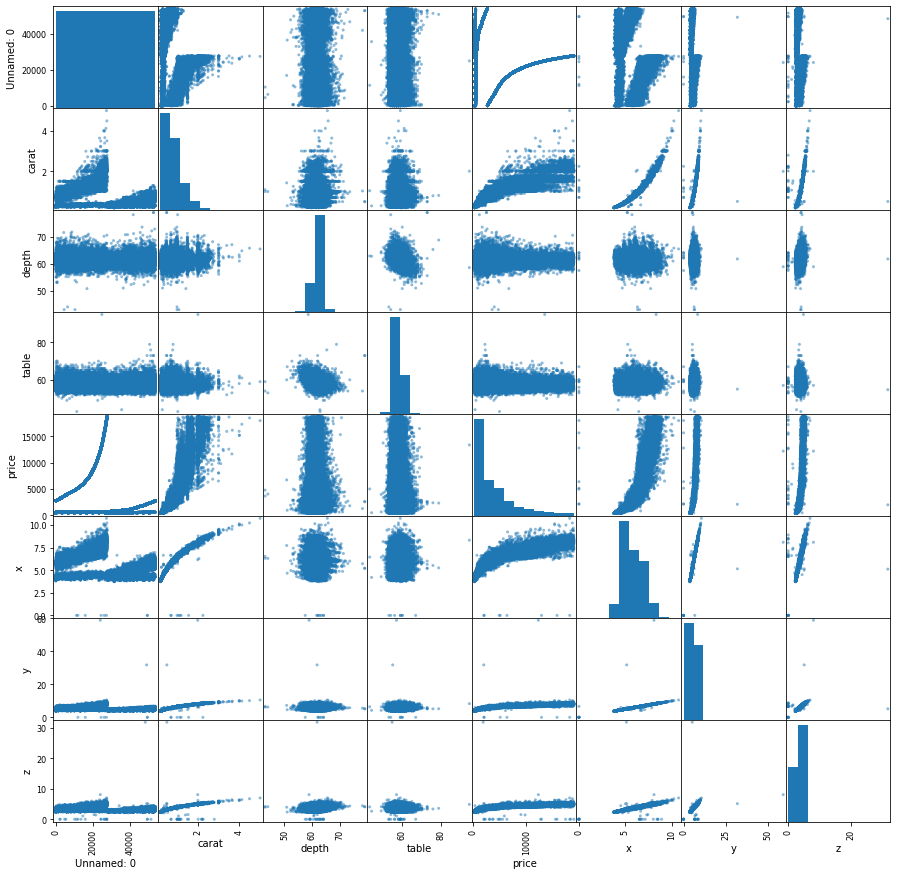

In [26]:
scatter_matrix(df, figsize=(15, 15));

In [27]:
X=df.drop('price', axis=1)
y=df.price

X['volumen']=X.x*X.y*X.z

In [28]:
X=X[['carat', 'cut', 'color', 'clarity', 'volumen']]

X.head()

,carat,cut,color,clarity,volumen
0,0.23,Ideal,E,SI2,38.202030
1,0.21,Premium,E,SI1,34.505856
2,0.23,Good,E,VS1,38.076885
3,0.29,Premium,I,VS2,46.724580
4,0.31,Good,J,SI2,51.917250


In [29]:
clarity={'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4,
         'VVS2':5, 'VVS1':6, 'IF':7}


cut={'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4}


color={'J':1, 'I':4, 'H':10, 'G':15, 'F':25, 'E':45, 'D':67}

In [30]:
X.clarity=X.clarity.apply(lambda x: clarity[x])

X.cut=X.cut.apply(lambda x: cut[x])

X.color=X.color.apply(lambda x: color[x])

X.head()

,carat,cut,color,clarity,volumen
0,0.23,4,45,1,38.202030
1,0.21,3,45,2,34.505856
2,0.23,1,45,4,38.076885
3,0.29,3,4,3,46.724580
4,0.31,1,1,1,51.917250


In [31]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

In [32]:
xgbr=XGBR()

xgbr.fit(X_train, y_train)

y_pred=xgbr.predict(X_test)

mse(y_test, y_pred, squared=False)  #rmse

547.9536359986229

In [33]:
y.min(), y.max()

(326, 18823)

In [39]:
# espacio de hiperparametros, a prioris

params={'n_estimators': hp.quniform('n_estimators', 10, 1000, 25),
        
        'max_depth': hp.quniform('max_depth', 4, 20, 1),
       
        'learning_rate': hp.uniform('learning_rate', 0.0001, 1.0),
        
        'subsample':hp.uniform('subsample', 0.7, 1),
       
        'gamma': hp.uniform('gamma', 0.1, 0.5),
       
        'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
       
        'reg_lambda': hp.uniform('reg_lambda', 0, 1)}

In [40]:
def objetivo(params):
    
    modelo=XGBR(n_estimators=int(params['n_estimators']),
                max_depth=int(params['max_depth']),
                learning_rate=params['learning_rate'],
                gamma=params['gamma'],
                subsample=params['subsample'],
                min_child_weight=params['min_child_weight'],
                reg_lambda=params['reg_lambda'],
                objective='reg:squarederror')
    
    eval_set=[(X_train, y_train), (X_test, y_test)]
    
    modelo.fit(X_train, y_train,
               eval_set=eval_set,
               eval_metric='rmse',
               verbose=False)
    
    y_pred=modelo.predict(X_test)
    
    rmse=mse(y_test, y_pred, squared=False)
    
    return {'loss': rmse, 'status': STATUS_OK}

In [41]:
%%time

best=fmin(fn=objetivo,
          space=params,
          algo=tpe.suggest,
          max_evals=25,
          trials=Trials())

best

100%|██████████| 25/25 [06:42<00:00, 16.11s/trial, best loss: 546.5319829343159]
CPU times: user 37min 29s, sys: 6min 7s, total: 43min 36s
Wall time: 6min 42s


{'gamma': 0.19658044107206876,
 'learning_rate': 0.06545908748966771,
 'max_depth': 5.0,
 'min_child_weight': 5.0,
 'n_estimators': 875.0,
 'reg_lambda': 0.8252137133544163,
 'subsample': 0.8649560040884718}

In [42]:
xgbr=XGBR()

xgbr.fit(X_train, y_train)

y_pred=xgbr.predict(X_test)

mse(y_test, y_pred, squared=False)  #rmse

547.9536359986229

In [43]:
# con los mejores

xgbr=XGBR(n_estimators=int(best['n_estimators']),
                max_depth=int(best['max_depth']),
                learning_rate=best['learning_rate'],
                gamma=best['gamma'],
                subsample=best['subsample'],
                min_child_weight=best['min_child_weight'],
                reg_lambda=best['reg_lambda'])

xgbr.fit(X_train, y_train)

y_pred=xgbr.predict(X_test)

mse(y_test, y_pred, squared=False)  #rmse

546.5319829343159